{% include toc title="In This Chapter" icon="file-text" %}

<div class='notice--success alert alert-info' markdown="1">

## <i class="fa fa-ship" aria-hidden="true"></i> Fundamentals of Vector Data in Python 

In this lesson, you will be introduced to the spatial vector data structure
and the shapefile file format (`.shp`). You will also learn how to open, explore and plot
vector data using the **Geopandas** package in **Python**.


## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

After completing this lesson, you will be able to:

* Describe the characteristics of 3 key vector data structures: points, lines and polygons.
* Open a shapefile in **Python** using **Geopandas** - `gpd.read_file()`.
* Plot a shapfile in **Python** using **Geopandas** - `gpd.plot()`.


## Recommended Readings

This lesson is an introduction to working with spatial data. If you wish to dive more deeply
into working with spatial data, check out the intermediate earth data science textbook
<a href="https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/spatial-data-vector-shapefiles/" target="_blank">chapter on 
spatial vector data.</a>
</div>


## About Spatial Vector Data

Vector data are composed of discrete geometric locations (x, y values) known as **vertices** that define the "shape" of the spatial object. The organization of the vertices determines the type of vector that you are working 
with. There are three types of vector data: 

* **Points:** Each individual point is defined by a single x, y coordinate. Examples of point data include: sampling locations, the location of individual trees or the location of plots.

* **Lines:** Lines are composed of many (at least 2) vertices, or points, that are connected. For instance, a road or a stream may be represented by a line. This line is composed of a series of segments, each "bend" in the road or stream represents a vertex that has defined `x, y` location.

* **Polygons:** A polygon consists of 3 or more vertices that are connected and "closed". Thus, the outlines of plot boundaries, lakes, oceans, and states or countries are often represented by polygons. 
<figure>
    <a href="https://www.earthdatascience.org/images/earth-analytics/spatial-data/points-lines-polygons-vector-data-types.png">
    <img src="https://www.earthdatascience.org/images/earth-analytics/spatial-data/points-lines-polygons-vector-data-types.png" alt="There are 3 types of vector objects: points, lines or polygons. Each object type has a different structure. Image Source: Colin Williams (NEON)."></a>
    <figcaption> There are 3 types of vector objects: points, lines or polygons. Each object type has a different structure. Image Source: Colin Williams (NEON)
    </figcaption>
</figure>


## Introduction to the Shapefile File Format Which Stores Points, Lines, and Polygons

Geospatial data in vector format are often stored in a `shapefile` 
format (`.shp`). Because the structure of points, lines, and polygons are 
different, each individual shapefile can only contain one vector 
type (all points, all lines or all polygons). You will not find 
a mixture of point, line and polygon objects in a single shapefile.

Objects stored in a shapefile often have a set of associated 
`attributes` that describe the data. For example, a line 
shapefile that contains the locations of streams might also
contain the associated stream name, stream "order" and other 
information about each stream line object.

<i class="fa fa-star"></i> **Data Tip:** More about shapefiles can found on 
<a href="https://en.wikipedia.org/wiki/Shapefile" target="_blank">Wikipedia</a>.
{: .notice--success }

## GeoJSON Files and Other Vector Formats
The shapefile is not the only way that vector data are stored. Geospatial data 
can also be delivered in a 
<a href="https://en.wikipedia.org/wiki/GeoJSON" target="_blank">GeoJSON format</a>, 
or even a tabular format where the spatial information is contained in columns. 

## What Data Are Stored In Spatial Vector Formats?  

Some examples of data that often are provided in a vector format include:

- census data including municipal boundaries
- roads, powerlines and other infrastructure boundaries
- political boundaries
- building outlines
- water bodies and river systems
- ecological boundaries
- city locations
- object locations including plots, stream gages, and building locations


## Import Shapefile Data Into Python Using Geopandas

You will use the **geopandas** library to work with vector data in 
**Python**. **Geopandas** is built on top of the **Python** **Pandas** library.
It stores spatial data in a tabular, `dataframe` format. 

In [1]:
# Import packages
import os

import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et

To begin, set your working directory to `earth-analytics` and then download a 
single shapefile. You will start with working with the Natural Earth 
country boundary lines layer.

<i class="fa fa-star"></i> **Data Tip:**  Note that below you are using **EarthPy** 
to download a dataset from naturalearthdata.com. **EarthPy** creates the earth-analytics
directory for you when you use it. You set the working directory
after you download the data as a precaution to ensure that the earth-analytics
directory already exists on your computer. This is not a standard order of 
operations but we are demonstrating it here to ensure the notebook runs on 
all computers! 
{: .notice--success }

In [2]:
# Download the data and set working directory
et.data.get_data(
    url='https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_0_boundary_lines_land.zip')

# Set working directory - earthpy creates earth-analytics for you in your home dir
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

BadZipFile: File is not a zip file

Next, you open the data using **Geopandas**. You can view the first 5 rows of the 
data using `.head()` in the same way you used `.head()` for **Pandas** dataframes. 

In [3]:
coastlines_url = "https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/physical/ne_50m_coastline.zip"

et.data.get_data(url=coastlines_url)

coastlines_path = os.path.join("data", "earthpy-downloads",
                               "ne_50m_coastline",
                               "ne_50m_coastline.shp")

coastlines = gpd.read_file(coastlines_path)
coastlines.head()

Extracted output to /home/nathan/earth-analytics/data/earthpy-downloads/ne_50m_coastline


,scalerank,featurecla,min_zoom,geometry
0,0,Coastline,1.5,"LINESTRING (180.00000 -16.15293, 179.84814 -16..."
1,0,Coastline,4.0,"LINESTRING (177.25752 -17.05420, 177.28740 -17..."
2,0,Coastline,4.0,"LINESTRING (127.37266 0.79131, 127.35381 0.847..."
3,0,Coastline,3.0,"LINESTRING (-81.32231 24.68506, -81.42007 24.7..."
4,0,Coastline,4.0,"LINESTRING (-80.79941 24.84629, -80.83887 24.8..."


### GeoPandas Creates GeoDataFrames Which Have the Same Structure As Pandas DataFrames

The structure of a **Geopandas** `GeoDataFrame` is very similar to a 
**Pandas** dataframe. A few differences include:

* the `GeoDataFrame` contains a geometry column which stores spatial information. The geometry column in your `GeoDataFrame` stores the boundary information (the lines that make up each 
shape in your data). This allows you to plot points, lines or polygons. 
* the`GeoDataFrame` stores spatial attributes such as coordinate reference systems and spatial extents.

Similar to **Pandas**, you can plot the data using `.plot()`

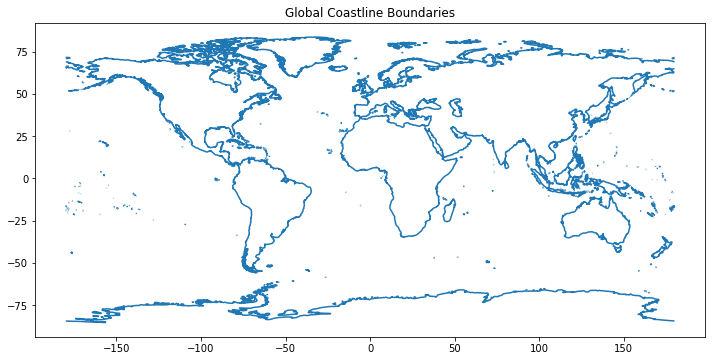

In [4]:
# Plot the data
f, ax1 = plt.subplots(figsize=(12, 6))
coastlines.plot(ax=ax1)

# Add a title to your plot
ax1.set(title="Global Coastline Boundaries")
plt.show()

### Check the Spatial Vector Data Type
You can look at the data to figure out what type of data are stored in the 
shapefile (points, line or polygons). However, you can also get that information 
by calling `.geom_type`

In [5]:
# Is the geometry type point, line or polygon?
coastlines.geom_type

0       LineString
1       LineString
2       LineString
3       LineString
4       LineString
           ...    
1423    LineString
1424    LineString
1425    LineString
1426    LineString
1427    LineString
Length: 1428, dtype: object

Also similar to **Pandas**, you can view descriptive information about the 
`GeoDataFrame` using `.info()`. This includes the number of columns, rows 
and the header name and type of each column.

In [6]:
coastlines.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   scalerank   1428 non-null   int64   
 1   featurecla  1428 non-null   object  
 2   min_zoom    1428 non-null   float64 
 3   geometry    1428 non-null   geometry
dtypes: float64(1), geometry(1), int64(1), object(1)
memory usage: 44.8+ KB


## Open Vector Point Data

Next, you will open up another shapefile using **Geopandas**.  

In [7]:
# Open a second layer
et.data.get_data(
    url='https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_populated_places_simple.zip')

# Create a path to the populated places shapefile
populated_places_path = os.path.join("data", "earthpy-downloads",
                                     "ne_50m_populated_places_simple",
                                     "ne_50m_populated_places_simple.shp")

cities = gpd.read_file(populated_places_path)
cities.head()

Extracted output to /home/nathan/earth-analytics/data/earthpy-downloads/ne_50m_populated_places_simple


,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,diffascii,nameascii,adm0cap,...,rank_max,rank_min,geonameid,meganame,ls_name,ls_match,checkme,min_zoom,ne_id,geometry
0,10,1,5,Admin-1 region capital,Bombo,None,None,0,Bombo,0.0,...,8,7,0.0,None,None,0,0,7.0,1159113923,POINT (32.53330 0.58330)
1,10,1,5,Admin-1 region capital,Fort Portal,None,None,0,Fort Portal,0.0,...,7,7,233476.0,None,None,0,0,7.0,1159113959,POINT (30.27500 0.67100)
2,10,1,3,Admin-1 region capital,Potenza,None,None,0,Potenza,0.0,...,8,8,3170027.0,None,None,0,0,7.0,1159117259,POINT (15.79900 40.64200)
3,10,1,3,Admin-1 region capital,Campobasso,None,None,0,Campobasso,0.0,...,8,8,3180991.0,None,None,0,0,7.0,1159117283,POINT (14.65600 41.56300)
4,10,1,3,Admin-1 region capital,Aosta,None,None,0,Aosta,0.0,...,7,7,3182997.0,None,None,0,0,7.0,1159117361,POINT (7.31500 45.73700)


<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge 1:  What Geometry Type Are Your Data

Check the geometry type of the `cities` object that you opened above in your code. 

</div>


In [8]:
# Add the code here to check the geometry type of the cities object
cities.geom_type

0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
1244    Point
1245    Point
1246    Point
1247    Point
1248    Point
Length: 1249, dtype: object

## Creating Maps Using Multiple Shapefiles

You can create maps using multiple shapefiles with **Geopandas** in a similar way
that you may do so using a graphical user interface (GUI) tool like ArcGIS 
or QGIS (open source alternative to ArcGIS). To do this you will need to open 
a second spatial file. Below you will use the Natural Earth populated places 
shapefile to add additional layers to your map.

To plot two datasets together, you will first create a **Matplotlib** figure object. 
Notice in the example below that you define the figure `ax1` in the first line. 
You then tell **GeoPandas** to plot the data on that particular figure using the 
parameter `ax=`

The code looks like this:

`boundary_lines.plot(ax=ax1)`


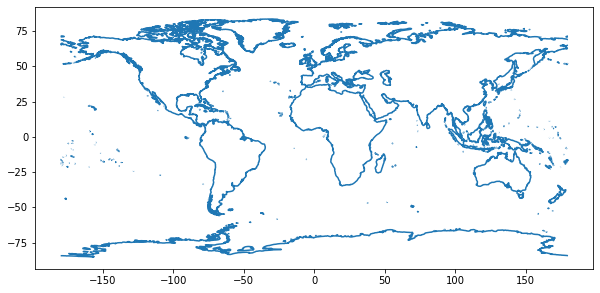

In [9]:
f, ax1 = plt.subplots(figsize=(10, 6))
coastlines.plot(ax=ax1)
plt.show()

To add another layer to your map, you can add a second `.plot()` call and 
specify the `ax=` to be `ax1` again. This tells **Python** to layer the two 
datasets in the same figure. 

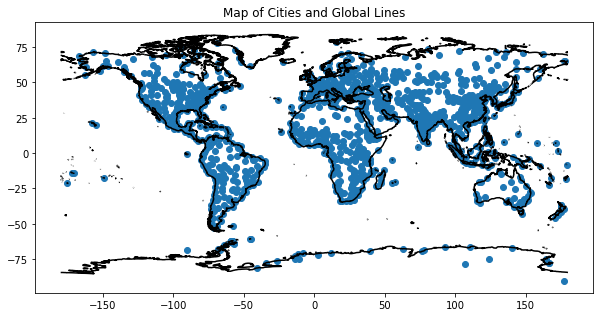

In [10]:
# Create a map or plot with two data layers
f, ax1 = plt.subplots(figsize=(10, 6))
coastlines.plot(ax=ax1,
                color="black")
cities.plot(ax=ax1)

# Add a title
ax1.set(title="Map of Cities and Global Lines")
plt.show()

If you don't specify the axis when you plot using `ax=`, each layer will be plotted on a 
separate figure! See the example below.

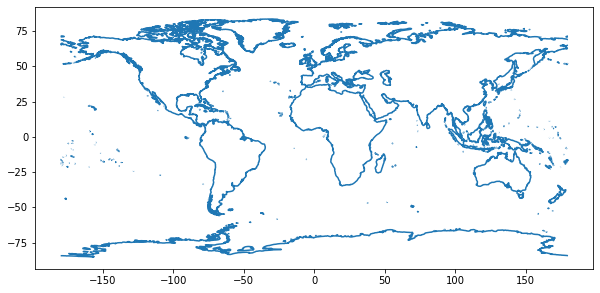

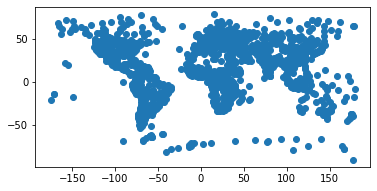

In [11]:
f, ax1 = plt.subplots(figsize=(10, 6))
coastlines.plot(ax=ax1)
cities.plot()
plt.show()

<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge 2: Create a Global Map

The code below will download one additional file for you that contains global country 
boundaries. Your goal is to create a map that contains 3 layers:

1. the cities or populated places layer that you opened above
2. the coastlines layer that you opened above and
3. the countries layer that you will open using the code below

To create a map with the three layers, you can:
1. Copy the code below that downloads the countries layer. 
2. Next, use **Geopandas** `read_file()` to open the countries layer as a `GeoDataFrame`.
3. Create a map of all three layers - in the same figure using the same `ax=`. The countries should be the bottom layer, and the cities and lines should be on top of that layer.  

```python
country_data_url = "https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_0_countries.zip"
et.data.get_data(url=country_data_url)

# Create a path to the countries shapefile
countries_path = os.path.join("data", "earthpy-downloads",
                              "ne_50m_admin_0_countries", 
                              "ne_50m_admin_0_countries.shp")
```

### Challenge BONUS: Customize your Map

If you have time, customize your map as follows:
    
* Adjust the linewidth of lines with `linewidth=4`
* Adjust the edge color of polygons using: `edgecolor="grey"`
* Adjust the color of your objects (the line color, or point color) using: `color='springgreen'`. 
    
Finally, add a title to your map using
`ax1.set(title="my title here")`

</div>


Extracted output to /home/nathan/earth-analytics/data/earthpy-downloads/ne_50m_admin_0_countries


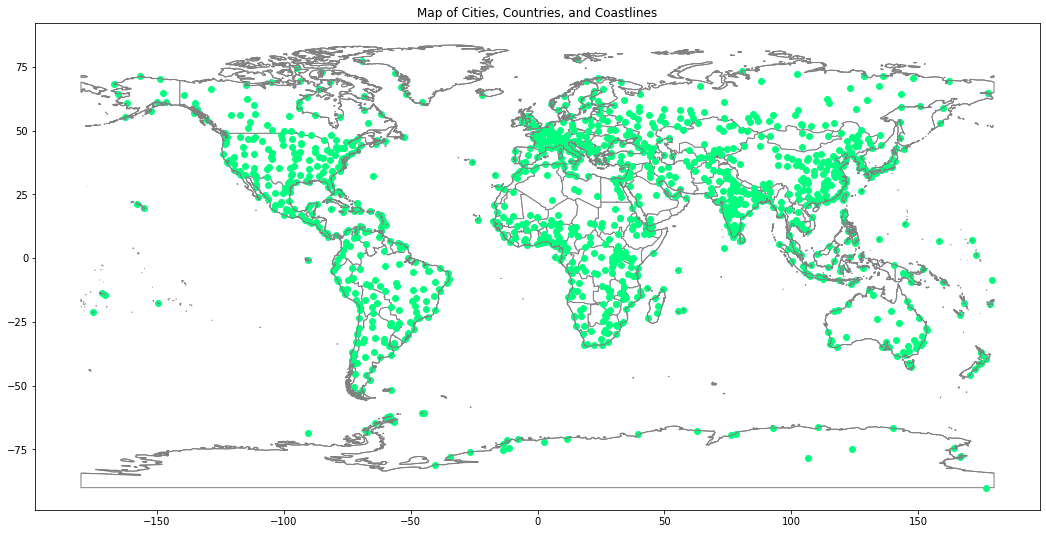

In [12]:
# Write the code for your map in this cell
country_data_url = "https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_0_countries.zip"
et.data.get_data(url=country_data_url)

# Create a path to the countries shapefile
countries_path = os.path.join("data", "earthpy-downloads",
                              "ne_50m_admin_0_countries",
                              "ne_50m_admin_0_countries.shp")


countries = gpd.read_file(countries_path)
countries.head()

# Create a map or plot with two data layers
f, ax1 = plt.subplots(figsize=(18, 12))
coastlines.plot(ax=ax1, color="grey", edgecolor="grey", linewidth=1)
countries.plot(ax=ax1, color="white", edgecolor="grey", linewidth=1)
cities.plot(ax=ax1, color="springgreen")

# Add a title
ax1.set(title="Map of Cities, Countries, and Coastlines")
plt.show()


<div class="notice--success alert alert-info" markdown="1">
<i class="fa fa-star"></i> **Data Tip:** There are many options to customize plots in Python. Below are 
a few lessons that cover some of this information!

* <a href="https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/plot-spatial-data/customize-vector-plots/python-customize-map-legends-geopandas/" target="_blank">Earth data science plotting textbook.</a>

* <a href="https://geopandas.org/gallery/plotting_with_geoplot.html" target="_blank">Geopandas plotting tutorial</a>
</div>


## Spatial Data Attributes

Each object in a shapefile has one or more attributes associated with it.
Shapefile attributes are similar to fields or columns in a spreadsheet. Each row
in the spreadsheet has a set of columns associated with it that describe the row
element. In the case of a shapefile, each row represents a spatial object - for
example, a road, represented as a line in a line shapefile, will have one "row"
of attributes associated with it.

<figure>
    <a href="https://www.earthdatascience.org/images/earth-analytics/spatial-data/spatial-attribute-tables.png">
    <img src="https://www.earthdatascience.org/images/earth-analytics/spatial-data/spatial-attribute-tables.png" alt="A shapefile has an associated attribute table. Each spatial feature in a spatial object has the same set of
    associated attributes that describe or characterize the feature.
    Attribute data are stored in a separate .dbf file. Attribute data can be
    compared to a spreadsheet. Each row in a spreadsheet represents one feature
    in the spatial object. Image Source: National Ecological Observatory Network (NEON)"></a>
    <figcaption>Each spatial feature in a spatial object has the same set of
    associated attributes that describe or characterize the feature.
    Attribute data are stored in a separate *.dbf file. Attribute data can be
    compared to a spreadsheet. Each row in a spreadsheet represents one feature
    in the spatial object.
    Image Source: National Ecological Observatory Network (NEON)
    </figcaption>
</figure>


The attributes for a shapefile imported into a GeoDataFrame can be viewed in the GeoDataFrame
itself. 

In [13]:
# View first 5 rows of GeoDataFrame
cities.head()

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,diffascii,nameascii,adm0cap,...,rank_max,rank_min,geonameid,meganame,ls_name,ls_match,checkme,min_zoom,ne_id,geometry
0,10,1,5,Admin-1 region capital,Bombo,None,None,0,Bombo,0.0,...,8,7,0.0,None,None,0,0,7.0,1159113923,POINT (32.53330 0.58330)
1,10,1,5,Admin-1 region capital,Fort Portal,None,None,0,Fort Portal,0.0,...,7,7,233476.0,None,None,0,0,7.0,1159113959,POINT (30.27500 0.67100)
2,10,1,3,Admin-1 region capital,Potenza,None,None,0,Potenza,0.0,...,8,8,3170027.0,None,None,0,0,7.0,1159117259,POINT (15.79900 40.64200)
3,10,1,3,Admin-1 region capital,Campobasso,None,None,0,Campobasso,0.0,...,8,8,3180991.0,None,None,0,0,7.0,1159117283,POINT (14.65600 41.56300)
4,10,1,3,Admin-1 region capital,Aosta,None,None,0,Aosta,0.0,...,7,7,3182997.0,None,None,0,0,7.0,1159117361,POINT (7.31500 45.73700)


In [14]:
# View data just in the pop_max column of the cities object
cities.pop_max

0          75000
1          42670
2          69060
3          50762
4          34062
          ...   
1244    11748000
1245    18845000
1246     4630000
1247     5183700
1248     7206000
Name: pop_max, Length: 1249, dtype: int64

<div class='notice--success alert alert-info' markdown="1">

<i class="fa fa-star"></i> **Data Tip:** Vector Metadata

The spatial and attribute data are not the only important aspects of a shapefile. 
The metadata of a shapefile are also very important. The metadata includes data 
on the Coordinate Reference System (CRS), the extent, and much more. For more 
information on what the metadata is, and how to access it, see the full lesson 
on vector data on the Earth Lab website, [here](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/spatial-data-vector-shapefiles/).</div>

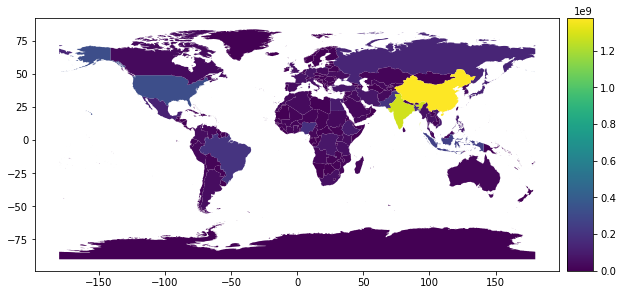

In [15]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

f, ax1 = plt.subplots(figsize=(10, 6))

divider = make_axes_locatable(ax1)
cax = divider.append_axes("right",
                          size="5%",
                          pad=0.1)

countries.plot(column='POP_EST',
               legend=True,
               ax=ax1,
               cax=cax)
plt.show()

<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge: Plot Cities Data

Plot the cities object so each point is colored according to the max population
value. 

HINT: checkout <a href="https://geopandas.org/mapping.html" target="_blank">this page on creating maps with Geopandas </a> for more information on customizing maps in **Geopandas**:

</div>

<AxesSubplot:>

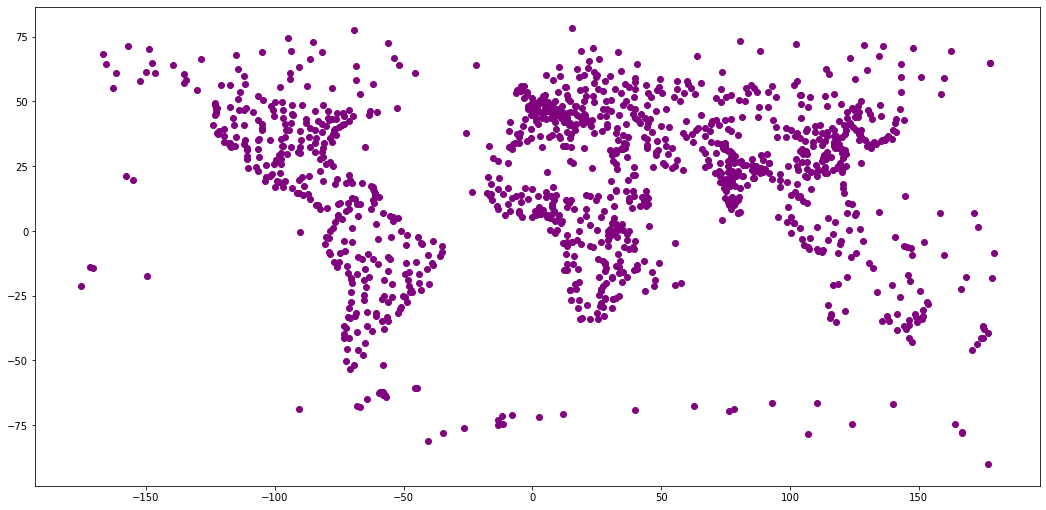

In [16]:
# Open your dataset below this line. Make sure to view the geom_type and the first few rows of the dataset
et.data.get_data(
    url='https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_populated_places_simple.zip')

# Create a path to the populated places shapefile
populated_places_path = os.path.join("data", "earthpy-downloads",
                                     "ne_50m_populated_places_simple",
                                     "ne_50m_populated_places_simple.shp")

cities = gpd.read_file(populated_places_path)

cities.geom_type

cities.head()

f, ax1 = plt.subplots(figsize=(18, 12))
cities.plot(ax=ax1, color="purple")

<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge: Plot Cities Data Using Quantiles -- Categorical Plot

You can plot your data according to categorical groups similar to what you might do in a tool
like ArcGIS or QGIS. See what happens when you customize your plot code above.

Set the following parameters:
* `legend=True` and
* `scheme="quantiles`

</div>


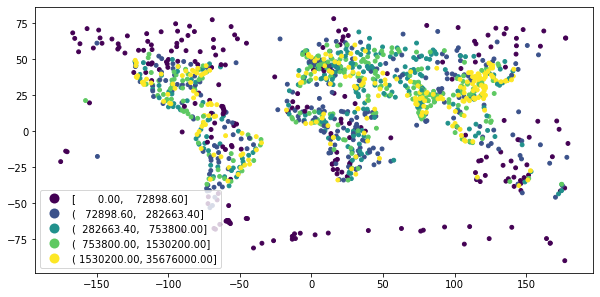

In [17]:
# Add your plot code here
# Open the data
et.data.get_data(
    url='https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_populated_places_simple.zip')

# Create a path to the populated places shapefile
populated_places_path = os.path.join("data", "earthpy-downloads",
                                     "ne_50m_populated_places_simple",
                                     "ne_50m_populated_places_simple.shp")

cities = gpd.read_file(populated_places_path)
cities.head()


# Add your plot code here
f, ax1 = plt.subplots(figsize=(10, 6))
cities.plot(ax=ax1, markersize=15, legend=True,
            column="pop_max", scheme='quantiles')

plt.show()

## Optional: Geoprocessing Vector Data Geoprocessing in Python: Clip Data

Sometimes you have spatial data for a larger area than you need to process.
For example you may be working on a project for your state or country. But 
perhaps you have data for the entire globe. 

You can clip the data spatially to another boundary to make it smaller. Once
the data are clipped, your processing operations will be faster. It will also
make creating maps of your study area easier and cleaner.

<figure>
    <a href="https://www.earthdatascience.org/images/earth-analytics/spatial-data/vector-clip.png">
    <img src="https://www.earthdatascience.org/images/earth-analytics/spatial-data/vector-clip.png" alt="When you clip a vector data set with another layer, you remove points, lines or polygons that are outside of the spatial extent of the area that you use to clip the data. This images shows a circular clip region - you will be using a rectangular region in this example. Image Source: ESRI"></a>
    <figcaption>When you clip a vector data set with another layer, you remove points, lines or polygons that are outside of the spatial extent of the area that you use to clip the data. This images shows a circular clip region - you will be using a rectangular region in this example. Image Source: ESRI
    </figcaption>
</figure>

In the bonus challenge below, you will clip the cities point data to the boundary of a single 
country. This will make the data smaller and easier to use.

<div class='notice--success alert alert-info' markdown="1">

<i class="fa fa-star"></i> **Data Tip:** Vector Metadata
Check out the <a href="https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/vector-data-processing/clip-vector-data-in-python-geopandas-shapely/">spatial data lessons in the intermediate earth-analytics textbook for a more in depth
look at clipping data.</a> 
</div>

Below you do the following:

1. you subset the countries layer to just the boundary of the United State of America
2. you then plot the data to look at the newly subsetted data! 
3. Finally you clip the cities data to only include cities that fall within the boundary of the United States

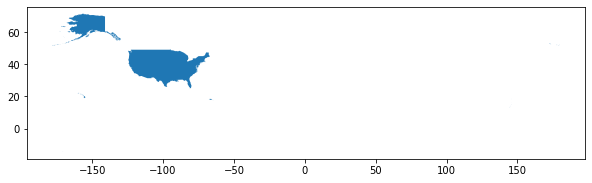

In [18]:
# Subset the countries data to just a single
united_states_boundary = countries.loc[countries['SOVEREIGNT']
                                       == 'United States of America']

# Notice in the plot below, that only the boundary for the USA is in the new variable
f, ax = plt.subplots(figsize=(10, 6))
united_states_boundary.plot(ax=ax)
plt.show()

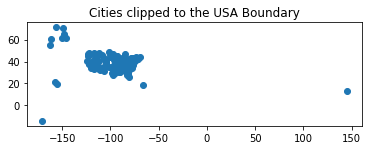

In [19]:
# Clip the cities data to the USA boundary
# Note -- this operation may take some time to run - be patient
cities_in_usa = gpd.clip(cities, united_states_boundary)

# Plot your final clipped data
f, ax = plt.subplots()
cities_in_usa.plot(ax=ax)
ax.set(title="Cities clipped to the USA Boundary")
plt.show()

<div class="notice--warning alert alert-info" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> BONUS Challenge: Clip Vector Data in Python

For this bonus challenge, you will clip the cities data that you opened above 
to the extent of a single country - Canada.  

`gpd.clip(data_to_clip, boundary_to_clip_to)`. 

Follow the example above to perform your clip operation. 

To perform the clip you need the following:

1. Create the boundary for Canada by subsetting the countries object
2. Clip the cities layer to the Canada boundary layer
3. Plot your final cities clipped layer!

When you clip, all of the spatial data outside of the spatial clip boundary (Canada) will not be 
included in the output dataset.

</div>

In [20]:
# Subset the countries data to just a single
canada_boundary = countries.loc[countries['SOVEREIGNT'] == 'Canada']

# Below this line clip the cities data to the Canada boundary that you created above.
cities_in_canada = gpd.clip(cities, canada_boundary)

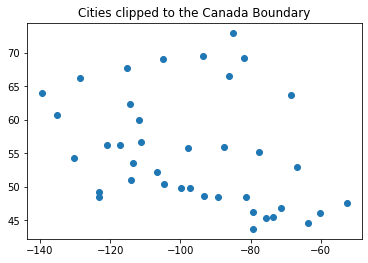

In [21]:
# Plot your final clipped data here
f, ax = plt.subplots()
cities_in_canada.plot(ax=ax)
ax.set(title="Cities clipped to the Canada Boundary")
plt.show()